In [ ]:
# Use Python 3.10 and this transformers==4.40.1 for stable compatibility
! pip install transformers==4.40.1

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM

In [2]:
# load model and dataset
model = AutoModelForCausalLM.from_pretrained('thuml/timer-base-84m', trust_remote_code=True)
df = pd.read_csv("https://raw.githubusercontent.com/WenWeiTHU/TimeSeriesDatasets/refs/heads/main/ETT-small/ETTh2.csv")

/Users/yong/miniconda3/envs/py310/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/yong/miniconda3/envs/py310/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
# perpare input
lookback_length = 1440      # support the maximum context length up to 2880 
seqs = torch.tensor(df["OT"][:lookback_length]).unsqueeze(0).float()

In [4]:
# generate forecast 
prediction_length = 96     # forecast the next 96 timestamps, supporting maximum prediction length encompassed in the context length
output = model.generate(seqs, max_new_tokens=prediction_length)

In [5]:
print(output.shape)

torch.Size([1, 96])


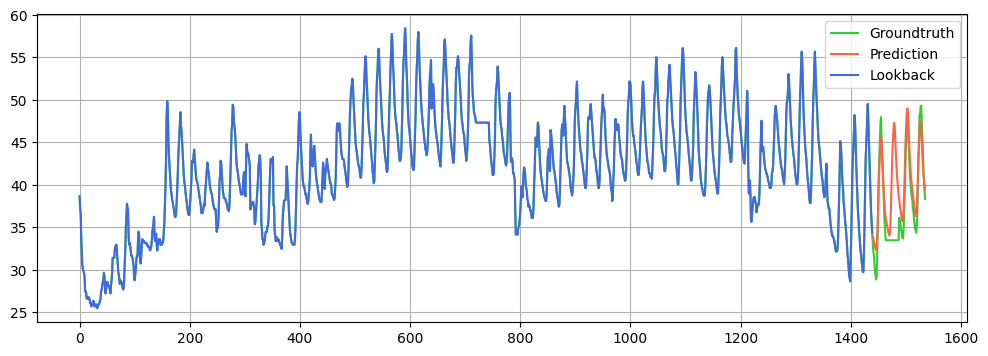

In [6]:
# plot the prediction

plt.figure(figsize=(12, 4))
plt.plot(df["OT"][:lookback_length + prediction_length], color="limegreen", label="Groundtruth")
plt.plot(range(lookback_length, lookback_length + prediction_length), output[0], color="tomato", label="Prediction")
plt.plot(df["OT"][:lookback_length], color="royalblue", label="Lookback")
plt.legend()
plt.grid()
plt.show()